<a href="https://colab.research.google.com/github/pmontman/pub-choicemodels/blob/main/nb/02_choice_model_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2: Choice model fundamentals, estimation of binary choice models

----
----

# Recap



* We have seen that we can describe preferences quantitatively by assigning a number to each alternative, the **utility** that the decision maker receives from choosing that alternative. Then we assume that decision makers always choose the alternative that has **maximum utility** from their choice set.
* We have seen that from some reasonable assumptions on preferences (completeness, transitivity), we can *always* find a function that maps from the alternative to their representative utility.
* In realistic situations, finding the exact function is unfeasible, so we add uncertainty in our model of reality.
 * We divide the utility into two components, the observed component, the one we can model, and the unobserved component or random component or error.

This view of choice modelling is called Random Utility Model (RUM) and the mathematical notation, for a decision maker $n$ and alternative $j$ is:

$$U_{nj} = V_{nj} + \varepsilon_{nj}$$


---
---



# Linear functions for the observed utility

The most fundamental way of capturing the observed component of the utility is through **linear relationships** from the observed variables of the choice:
 * the attributes of the alternatives
 * the socioeconomic characteristics of the individuals.

What is a linear relationship?

Lets go back to our example of the coffee shop. We simplify by assuming that we offer two products, latte and espresso. These are our two alternatives. 
We suppose that only two factors are involved in the choice, only two factors influence the utility that indivuals derive:
 * Price of the coffee
 * Age of the individual

Intuitively we might think that the more expensive the alternative, the less utility people derive from choosing it. The older the more they will lean towards espresso, it grows on you (Obviously this model is a gross oversimplification).
We can make that relationship very specific by saying it is a linear relationship. This means that the measured variables will be multipled by some numbers (the coefficients) and summed together to produce the observed component of the utility. Each coefficient multiplies one of the variables.
Lets call $\alpha$ the coefficient that multiplies the price, and $\beta$ the coefficients that multiplies age. We can assume that each alternative has its own coefficients, leading to the following formula for the observed utility:

 $$V_{nj} = \alpha_j \text{Price}_j + \beta_j\text{Age}_n$$

 This is an example of linear relationship, it is the same concept as linear models in Statistics (linear regression), Machine Learning and many other fields.

We now have our first choice model, we only need to find good values for the coefficients, so they explain and predict the data well (as well as possible with this simple model). The process of finding the values for the coefficients from data is the **estimation of the model**.

---
---


# Estimation of Binary Choice models

The main difficulty of choice models is that we cannot use our classical methods such as statistical linear regression, because the dependent variable, the utility, is not observed, we do not have data for the $V_{nj}$. We only observe whether they chose one or the other, it is which of the $J$ alternatives they chose. And because of randomness or limitations of our model, even that result is random, so the best we can do is capture choice probabilities.

We will first discuss the scenario of only two alternatives, in our example only offer latte and espresso.
This simplifies things a lot and serves as a nice introduction to estimation.

The main reason behind the simplification is that when we can only choose between two alternatives, if we can approximate the probability of choosing one of the alternatives, the probability of choosing the other alternative is completely determined. 
Say the probability of choosing Latte is $p$, then the probability of choosing espresso is $1-p$, because probabilities have to sum 1. If we have one of the probabilities, we do not need to think much about the other.

This allows us to focus on modelling only the probability of one of the alternatives.

---
---

# Level 0: Estimating the linear model by least squares

Lets start with a way of estimation that we are all familar with, linear regression, or linear least squares.

Linear least squares requires the dependent variable to be numerical, but we do not have numbers, we only know whether indivudals chose latte or espresso.
In other words, our data looks like this:

| Choice      | Price | Age | Name |
| ----------- | ----- | ------ | -------|
| Latte      |  4    | 19 | Pablo |
| Espresso      |  3.5    | 21 | Fortuna |
| Espresso      |  3.0    | 32 | Andrew |
| Latte      |  3.5   | 20 | Jing |
| Espresso      |  3.0    | 28 | Jarif |


In our binary choice, we can easily turn this result into numbers by assigning the number 1 if the indivudal chose latte and 0 is they chose espresso.

|Choice Number | Choice      | Price | Age | Name |
|---| ----------- | ----- | ------ | -------|
|1| Latte      |  4    | 19 | Pablo |
|0| Espresso      |  3.5    | 21 | Fortuna |
|0| Espresso      |  3.0    | 32 | Andrew |
|1| Latte      |  3.5   | 20 | Jing |
|0| Espresso      |  3.0    | 28 | Jarif |


 * We could have chosen the other way around (1 for espresso and 0 for latte).
 * We could have chosen other arbitrary numbers, but the 0/1 option gives us an additional benefit. The interpretation of this number as the probability of choosing latte.


## Fitting

We can estimate a linear model by out traditional linear least squares. To make things even more simple, lets consider a linear model that depends only on the age of the decision maker.

$$ \text{ChoiceNumber} = \beta \text{Age} $$

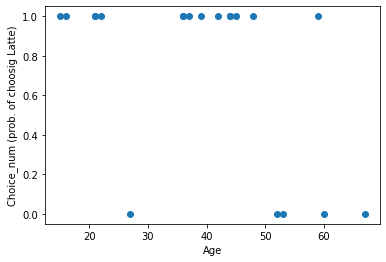

In [79]:
#@title Plot: example of assigning numbers to choices
import numpy as np
from scipy.stats import logistic
import matplotlib.pyplot as plt
from sklearn import linear_model

np.random.seed(2021)
age = np.random.randint(15, 69, 20)
age = np.sort(age)
choice_probs = 1 - logistic.cdf(age * 0.12 - 6)
rolls = np.random.random_sample(len(choice_probs))
choice_num = (rolls < choice_probs) + 0

#plt.plot(age, choice_probs)
plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)');


We can fit a linear least squares to this data

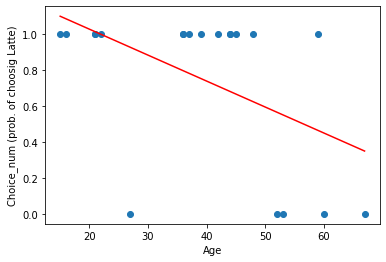

In [80]:
#@title Plot of the linear least squares fit

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(age[:, np.newaxis], choice_num[:, np.newaxis])

preds = regr.predict(age[:, np.newaxis])

plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)')
plt.plot(age, preds, c='red')


The value of the coefficient $\beta$ is:

In [81]:
#@title 
print('The value of the coefficient Beta: ', regr.coef_)

The value of the coefficient Beta:  [[-0.01440593]]


We can see the approximation.
If we interpret as 'probability of choosing latte'.
There is a problem, the prediction go over 1 for ages under 20. This is not consistent with the idea of probability

 * Ignore the problem, if we get values over 1, we assume the probability is one.
 * Consider that values over 1 are actually impossible, so we could get a better model if we introduce that idea. We can try took look for a relationship that is not purely linear, use a model that is restricted to the [0,1] interval.

 ---
 ---

# Level 1: 'Squashing' through the logistic

A very common way of transforming any number to the interval [0,1] is to apply
the logistic function. The logistic is a 'S', also named 'sigmoid' that restrics its output to the range [0,1] while keeping the notion of order of the input (if $x$ is greater than $y$ in the input, the output of $x$ will also be greater.


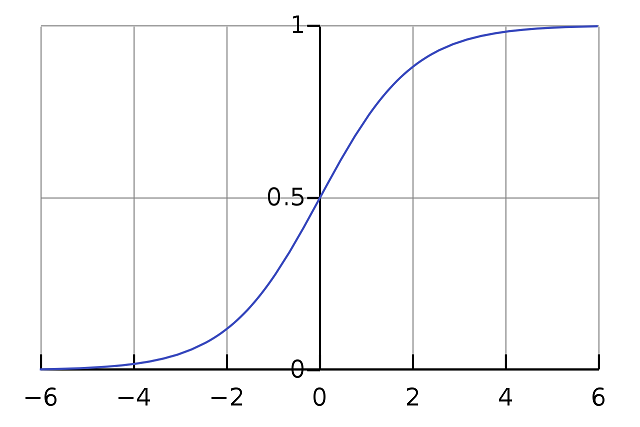

The function of the logistic

$$S(x) = \frac{e^{x}}{1 + e^{x}}$$

We want to squash the output of the linear combination to the interval [0,1]
we need to pass it through the sigmoid.

$$ ChoiceNumber = \frac{e^{\beta\text{Age}}}{ 1 + e^{\beta\text{Age}}}$$

Now we are sure that the output will be int [0,1], but the model is no longer a linear relationship.


---
---

# Least squares estimaton of the logistic

When we do the squasing, there is no longer a linear relationship, it is nonlinear.  We cannot just plug the coefficients we obtained from the linear and
squash the output, we need to estimate proper values for the squashed version.
We can keep to the notion of least squares, finding the value of the coefficents that make the prediction closer to the observed numbers.
In the following plot, in red the squashed version of the model, in pink the non-squashed version.

2.2372815002344435


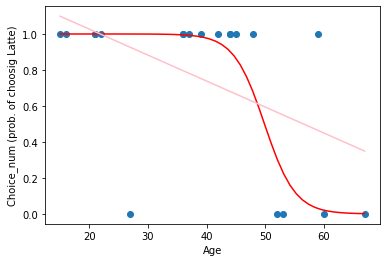

In [83]:
#@title Code for fitting a sigmoid squashing of the linear model
from scipy.optimize import minimize

def sigmoid(x):
  return np.exp(x) / (1 + np.exp(x))

def err_beta(beta):
  return sum((sigmoid(age*beta + 19) - choice_num)**2)
err_beta = np.vectorize(err_beta)

beta_range = np.linspace(-10, 10, num=500)
errs = err_beta(beta_range)
#print(beta_range[np.argmin(errs)])
print(np.min(errs))


base = np.linspace(min(age), max(age))
preds_sig = sigmoid(beta_range[np.argmin(errs)]* base + 19)

plt.scatter(age, choice_num)
plt.xlabel('Age')
plt.ylabel('Choice_num (prob. of choosig Latte)')
plt.plot(base, preds_sig, c='red')
plt.plot(age, preds, c='pink')



---
---

# Interpretation of the logistic squasing as log-odds: The logit

Odds is a common way of comparing probabilities of two events.
It is comming in betting, the odds of A against B, such as 2-to-1. Mathematically we define the odds as the ratio of the two probabilities, with the event of interest in the nominator.

$$\text{Odds} = \frac{P(A)}{P(B)}$$

It turns out that the linear relationship that gets squashed by the logistic function to the range [0,1] can be interpreted as the logarithm of the odds.

$$ P(\text{Latte}) $$

Vecause we have two alternatives, we know that:

$$P(\text{Espresso}) = 1 - P(\text{Latte})$$ 

Then we can plug the formula for the odds

$\text{Odds of Latte} = \frac{P(\text{Latte})}{P(\text{Espresso})} = \frac{P(\text{Latte})}{1 - P(\text{Latte})}$

Recall the formula for the logistic:
$$S(x) = \frac{e^{x}}{1 + e^{x}}$$
we can divide nominator and denominator by $e^x$ to get an equivalent expression of the logistic:
$$ S(x) = \frac{1}{1 + e^{-x}}$$
If we interpred the output of the logistic squashing as a probability,
we get.

$$P(\text{Latte}) = \frac{1}{ 1 + e^{-\beta\text{Age}}}$$

This is an qeuivalent formula to the beginning of the section:

 $$ ChoiceNumber = \frac{e^{\beta\text{Age}}}{ 1 + e^{\beta\text{Age}}}$$

Introduce the expression of $P(\text{Latte})$ from the logistic squashing in the formula for the odds.

$$\text{Odds of Latte} = \frac{ \frac{1}{ 1 + e^{-\beta\text{Age}}} }{1 - \frac{1}{ 1 + e^{-\beta\text{Age}}}}$$

Simplifying a bit:
$$\text{Odds of Latte} = \frac{ \frac{1}{ 1 + e^{-\beta\text{Age}}} }{\frac{1 + e^{-\beta\text{Age}} - 1}{ 1 + e^{-\beta\text{Age}}}} = \frac{1}{e^{-\beta\text{Age}}} = e^{\beta\text{Age}}$$
if we take the log
$$log(\text{Odds of Latte}) = \beta\text{Age}$$

And now we have a nice interpreatation of the logistic squashing, what we are doing is imposing a linear relationship for the logarithm of the log odds.

The **logit** function is the invese of the logistic:
$$\text{logit}(x) = \log \left( \frac{x}{1-x} \right)$$

And there is where the name of the logit model comes from. The term logit model is the more popular in econometrics. In statisticis it is called logistic regression. In machine learning, we can call it a perceptron is is a model for an artificial neuron.

---
---


# Level 2: Maximum likelihood estimation

We have seen that we can estimate the coefficients of the model by first assigning numbers to the outcome and fitting the function to those numbers by some method such as least squares. When the numbers assigned are 0 - 1, then we can think that the output of the model are probabilities.

But we once we have established that we want to do the logistic squashing to obtain probabilities, there are other ways of estimating the coefficients.
We are not forced to use least squares, we could be doing, for example least absolute value. The reason for using least squares was to reuse the technique that we know from basic statistics, least squares linear regression.

In the context of choice modelling (and other categorical response), there is a more natural way of estimating the coefficients. Because we are outputing probabilities, we can think as the following question:

What output probabilities are the most likely to have been observed in the data?

To answer this question, we need to know the probability distribution family of the experiment. But in this case, there is not much doubt, every data point that we have is the result of a Bernoulli experiment. Every time someone makes a choice between two alternatives, considering that there is some randomness involved, we can model it with a $\text{Bernoulli}(p)$ with $p$ the parameter of distribution, the probability of success of the experiment. By success we can define one of the alternatives (we are choosing Latte in out recurring example).


$$P(\text{Latte}) = \frac{1}{ 1 + e^{-\beta\text{Age}}}$$

For the $i$-eth observation in out data, our model produces the the probability of observing latte for that observation.

$$P(\text{Latte}_i) = p_i = \frac{1}{ 1 + e^{-\beta\text{Age}_i}}$$

Imagine that for the $i$-eth observation, we have actually observed latte.
What is the most 'likely' value of $p_i$ that would have produced latte as outcome? The answer is simple, $p_i=1$. What is the value of $\beta$ that would have produced a $p_i=1$, it is a very large value, with $\beta = +\infty$ we will get $p_i=1$, but given the exponentiation, a value of 100 will be good enough.

The likelihood function of the coefficient $\beta$.
When we have many observations, the probabilities $p$ that make the observed that more likely to have appeared.

Remember from the bernoulli distribution, for $k=1$ is a success and $k=0$ the failure. In our case Latte is sucess, espresso is failure.

$$B(k, p) = p^k(1-p)^{1-k} $$

When we have many independent samples, the joint probability is the product
of individual probabilities. For $N$ samples, when the probability of the Bernoulli can vary per sample, the probability of have observed the data is, in mathematical notation.

$$\prod_{i=1}^{N} p_i^{k}(1-p_i)^{1-k} $$

Likelihood function of the coefficient $\beta$ , when we plug in the expression for the $p_i$
$$ L(\beta | k, \text{Age})= \prod_{i=1}^{N} \left(\frac{1}{ 1 + e^{-\beta\text{Age}_i}}\right)^{k}\left(1-\frac{1}{ 1 + e^{-\beta\text{Age_i}}}\right)^{1-k}   $$

We want to find the $\beta$ that maximizes this likelihood, that it is why it is called maximum likelihood estimation.
We will not study the algorithm for finding the $\beta$ in this unit, we will use tools that have it implemented already. The way to find it is through mathematical optimization, for example, gradient descent.


**Maximum likelihood is the standard way of estimating the logit.**

Observed that we do not really need to do the squashing, but we risk getting absurd results is we do not limit the $p_i$ to be in [0,1].

---
---

# Going back to utilities

To deliver the explanation of the logit we have momentarily forgotten about utilities.

It turns out that under the logit, we can interpret the linear relationship that get squashed as the observed component of the utility.
The unobserved component is considered to come from a independent and identically distributed Gumbel distribution (also called Type 1 Extreme value).
Linking logistic regression to the fundamental theory of utility, showing tha the statistical model is consisten with the underlying theory of utility, is part of why Daniel McFadden receiver the Nobel prize.

So the observed utility and the log-odds are very similar concepts in the logit model.

---
---

#Other forms of squashing

The logistic is one among many functions that can squash values between 0 and 1 to turn them into probabilities. Another one is the probit, which uses the expression for the cumulative distribution function of the Gaussian.
Just as the logistic curve induces a Random Utility Model with a Gumbel distribution, the probit induces a RUM with Gaussian distribution.

---
---

# Model interpretation

* Elasticities
* Willingness to pay

---
---

# Mode validation

* Comparing likelihoods
* Accuracy score
* Hypothesis tests for parameters

---
---